Importamos el fichero

In [1]:
import pandas as pd
#import plotly.tools as tls
import matplotlib.pyplot as plt
# Crea los gráficos en el propio notebook
%matplotlib inline 
#import seaborn as sns

#Leemos el fichero con los datos
datos = pd.read_csv("DATA_SALIDA/fichero_salida.txt", header=0, sep="|", encoding = "ISO-8859-1")
datos['n'] = 1
datoslimpios = datos[(datos.tipo == ('Clientes')) | (datos.tipo == ('Respuestas'))]

#Creamos un indice de tipo Datetime al dataframe leido
datos.index = pd.DatetimeIndex(datos.date)
datoslimpios.index = pd.DatetimeIndex(datoslimpios.date)

#print(datos.describe())
datoslimpios.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,tid,fecha,...,minuto,value,palapos,palaneg,txtnosw,tipo,twpos,twneu,twneg,n
date,,,,,,,,,,,,,,,,,,,,,
2011-03-01 18:15:00,MundoSeguros,03/01/2011 18:15,0,1,el 10 de enero comienza a funcionar al asegura...,NaN,@MundoSeguros,NaN,"2,1978E+16",2011-03-01,...,15,0,0,0,10 enero comienza funcionar aseguradora verti ...,Clientes,0,1,0,1
2011-06-01 12:12:00,rc_morano,06/01/2011 12:12,0,0,para los que tengais que cambiar de seguro pro...,NaN,NaN,NaN,"2,29737E+16",2011-06-01,...,12,1,1,0,tengais cambiar seguro pronto pronto nacera ve...,Clientes,1,0,0,1
2011-09-01 21:52:00,locutorios,09/01/2011 21:52,0,0,la mayor parte del vertido de gasoil en aguas ...,NaN,NaN,NaN,"2,4207E+16",2011-09-01,...,52,6,2,0,mayor parte vertido gasoil aguas tarragona dis...,Clientes,1,0,0,1
2011-10-01 12:56:00,Designit_ES,10/01/2011 12:56,0,0,acaba de nacer verti www.verti.es el proyecto ...,NaN,NaN,NaN,"2,44343E+16",2011-10-01,...,56,0,0,0,acaba nacer verti wwwverties proyecto mas espe...,Clientes,0,1,0,1
2011-10-01 13:17:00,CarlosFdez,10/01/2011 13:17,0,0,nueva web de verti seguros enhorabuena a todo ...,NaN,@vertiseguros,NaN,"2,44396E+16",2011-10-01,...,17,2,1,0,nueva web verti seguros enhorabuena equipo rt ...,Clientes,1,0,0,1


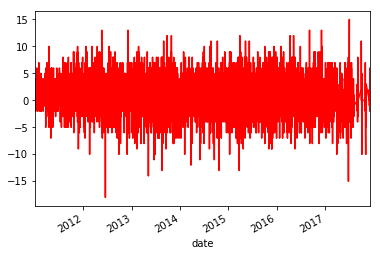

In [2]:
#Pintamos los datos del número de viajes para analizar los gráficos
#datos2 = datos[datos.tipo in ('Clientes')]
datoslimpios.value.plot(color="r")

In [ ]:
weekly_summary = datoslimpios.resample('M').mean()
weekly_summary.head()
#weekly_summary.nota.plot()



In [ ]:
datos.boxplot()
datos.hist()

In [ ]:
datos.hist(column="value",        # Column to plot
              figsize=(8,8),         # Plot size
              color="blue") 
datoslimpios.hist(column="value",        # Column to plot
              figsize=(8,8),         # Plot size
              color="red") 


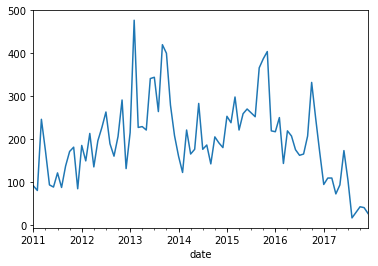

In [5]:
datasummary = datos.resample('M').sum()
datasummary['2011-01':'2017-12'].n.plot(label='Número de Tweets')


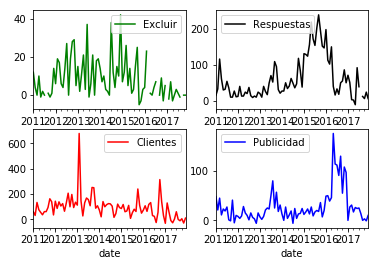

In [40]:
datoscli = datos[(datos.tipo == ('Clientes'))]
datospub = datos[(datos.tipo == ('Publicidad'))]
datosexc = datos[(datos.tipo == ('Excluir'))]
datosres = datos[(datos.tipo == ('Respuestas'))]

datosclisum = datoscli.resample('M').sum()
datospubsum = datospub.resample('M').sum()
datosexcsum = datosexc.resample('M').sum()
datosressum = datosres.resample('M').sum()

plt.figure(1)
plt.subplot(2,2,1)
datosexcsum['2011-01':'2017-12'].value.plot(label='Excluir', color="green", legend='Clientes')
plt.subplot(2,2,2)
datosressum['2011-01':'2017-12'].value.plot(label='Respuestas', color="black", legend='Clientes')
plt.subplot(2,2,3)
datosclisum['2011-01':'2017-12'].value.plot(label='Clientes', color="red", legend='Clientes')
plt.subplot(2,2,4)
datospubsum['2011-01':'2017-12'].value.plot(label='Publicidad', color="blue", legend='Clientes')



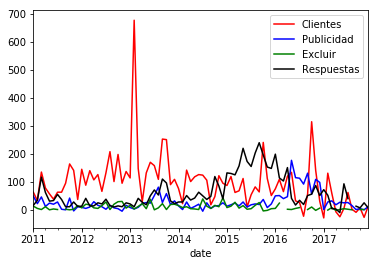

In [39]:

datosclisum['2011-01':'2017-12'].value.plot(label='Clientes', color="red", legend='Clientes')
datospubsum['2011-01':'2017-12'].value.plot(label='Publicidad', color="blue", legend='Publicidad')
datosexcsum['2011-01':'2017-12'].value.plot(label='Excluir', color="green", legend='Excluir')
datosressum['2011-01':'2017-12'].value.plot(label='Respuestas', color="black", legend='Respuestas')

#datosexc.head()

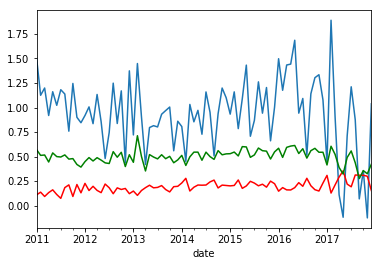

In [3]:
datasummary = datos.resample('M').mean()
datasummary['2011-01':'2017-12'].value.plot(label='nota')
datasummary['2011-01':'2017-12'].twneg.plot(label='palabras negativas', color="red")
datasummary['2011-01':'2017-12'].twpos.plot(label='palabras positivas', color="green")

In [ ]:
datasummary = datos.resample('M').mean()
datasummary['2016-01':'2017-12'].value.plot(label='nota')
datasummary['2016-01':'2017-12'].twneg.plot(label='palabras negativas', color="red")
datasummary['2016-01':'2017-12'].twpos.plot(label='palabras positivas', color="green")


Creamos un fichero con solamente la fecha y el valor de la nota para los tweets válidos (clientes y respuestas) para ver la evolucion en el tiempo pero con boxplots por meses

In [ ]:
#Leemos el fichero con los datos
datos2 = pd.read_csv("DATA_SALIDA/fichero_salida.txt", header=0, sep="|", encoding = "ISO-8859-1")
datoslimpios2 = datos2[(datos2.tipo == ('Clientes')) | (datos2.tipo == ('Respuestas'))]
datosseries = datoslimpios2[['fecha','value']]
datosseries.to_csv("DATA_SALIDA/PRUEBA_SERIES.csv", sep=';', encoding='utf-8')
datosseries.head()


In [ ]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('DATA_SALIDA/PRUEBA_SERIES.csv', header=0, sep = "\t")
series.plot(label='value')
pyplot.show()

In [ ]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('DATA_SALIDA/PRUEBA_SERIES.csv', header=0, sep = "\t")
series.hist()
pyplot.show()

In [ ]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
from pandas import concat
pyplot.rcParams["figure.figsize"] = (20,3)
series = Series.from_csv('DATA_SALIDA/PRUEBA_SERIES.csv', header=0, sep = "\t")
#one_year = series['2016']
groups = series.groupby(TimeGrouper('M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,85)
months.boxplot()
pyplot.axis([0, 85, -20,20])
pyplot.show()

In [ ]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
from pandas import concat
pyplot.rcParams["figure.figsize"] = (20,3)
series = Series.from_csv('DATA_SALIDA/PRUEBA_SERIES.csv', header=0, sep = "\t")
#one_year = series['2016']
groups = series.groupby(TimeGrouper('A'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,8)
months.boxplot()
pyplot.axis([0, 8, -20,20])
pyplot.show()

Creamos un fichero con los tweets catalogados como positivos que servirán de entrada para los modelos de despues.

In [ ]:
import pandas as pd
#import plotly.tools as tls
import matplotlib.pyplot as plt
# Crea los gráficos en el propio notebook
%matplotlib inline 

#Leemos el fichero con los datos POSITIVOS
datosnew = pd.read_csv("DATA_SALIDA/fichero_salida.txt", header=0, sep="|", encoding = "ISO-8859-1")
datoslimpiosnew = datosnew[(datosnew.tipo == ('Clientes')) | (datosnew.tipo == ('Respuestas'))]
datoslimpiosnew = datoslimpiosnew.reset_index()
datoslimpiosnew = datoslimpiosnew[datoslimpiosnew.value > 0]

positivos = datoslimpiosnew[['text']]
positivos_sinsw = datoslimpiosnew[['txtnosw']]

#guardamos a disco en formato csv
positivos.to_csv('DATA_SALIDA/positivos.csv', sep='\t', encoding='utf-8')
positivos_sinsw.to_csv('DATA_SALIDA/positivos_sinsw.csv', sep='\t', encoding='utf-8')



In [ ]:
import pandas as pd
#import plotly.tools as tls
import matplotlib.pyplot as plt
# Crea los gráficos en el propio notebook
%matplotlib inline 

#Leemos el fichero con los datos POSITIVOS
datosnew = pd.read_csv("DATA_SALIDA/fichero_salida.txt", header=0, sep="|", encoding = "ISO-8859-1")
datoslimpiosnew = datosnew[(datosnew.tipo == ('Clientes')) | (datosnew.tipo == ('Respuestas'))]
datoslimpiosnew = datoslimpiosnew.reset_index()
datoslimpiosnew = datoslimpiosnew[datoslimpiosnew.value < 0]

negativos = datoslimpiosnew[['text']]
negativos_sinsw = datoslimpiosnew[['txtnosw']]

#guardamos a disco en formato csv
negativos.to_csv('DATA_SALIDA/negativos.csv', sep='\t', encoding='utf-8')
negativos_sinsw.to_csv('DATA_SALIDA/negativos_sinsw.csv', sep='\t', encoding='utf-8')

